# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales
- Redes neuronales recurrentes

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

## Redes de funcion de base radial

Las redes de base radial son un tipo de RNA que calculan la salida en función de la distancia a un punto denominado centro. **Este tipo de redes construyen aproximaciones que son combinaciones lineales de múltiples funciones locales no lineales.** Utilizan funciones de base radial como funciones de activación, y la salida de la red es una combinación lineal de funciones de base radial de las entradas y de los parámetros de las neuronas.

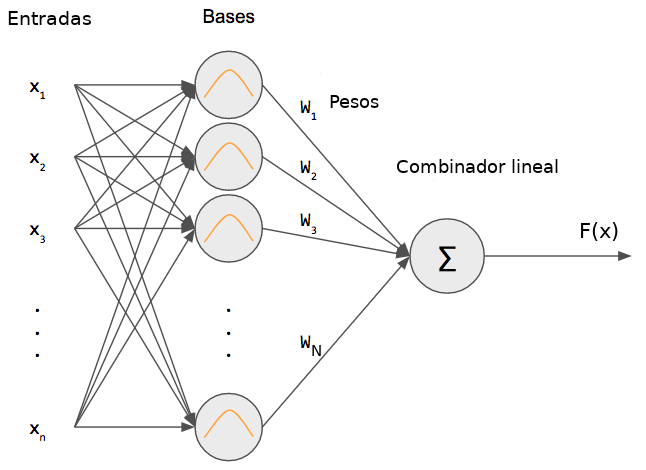

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig2.png')

Al igual que los perceptrones multicapa, sirven como aproximadores universales. Sin embargo, en el perceptrón multicapa se entrena la red reduciendo el error (optimización), con las redes de función de base radial se trata de aproximar la superficie a un espacio de gran dimensión.

El aprendizaje es equivalente a encontrar una superficie en un espacio multidimensional que proporcione el mejor ajuste a los datos de entrenamiento.

Las redes de función de base radial (RBF) suelen tener tres capas: una capa de entrada, una capa oculta con una función de activación no lineal y una capa de salida lineal. La transformación del espacio de entrada al espacio de las unidades ocultas es no lineal, y la transformación del espacio de las unidades ocultas al espacio de salida es lineal.

Las unidades ocultas son un conjunto de funciones que forman una base arbitraria para los patrones de entrada cuando se expanden en el espacio de las unidades ocultas, estas funciones se denominan funciones radiales.

La función de base radial es una función que calcula la distancia euclidiana de un vector de entrada $x$ respecto de un centro $c$.

$$f\left(\boldsymbol{x}\right)=\left\Vert \boldsymbol{x}-\boldsymbol{c}_{i}\right\Vert $$

A cada neurona de la capa de entrada le corresponde una función de base radial $\Phi\left(\boldsymbol{x}\right)$ y un peso de salida $w_i$. La salida de una red RBF es: 

$$F\left(\boldsymbol{x}\right)=\sum_{i=1}^{N}w_{i}\Phi\left(\boldsymbol{\left\Vert x-c_{\mathit{i}}\right\Vert }\right)$$

Donde $\Phi\left(\boldsymbol{\left\Vert x-c_{\mathit{i}}\right\Vert }\right)$ es un conjunto de $N$ funciones arbitrarias conocidas como funciones radiales. Los datos $c_i$ son los centros de las funciones radiales.

La función $\Phi\left(\boldsymbol{\left\Vert x-c_{\mathit{i}}\right\Vert }\right)$ = $\Phi\left(r\right)$, con $r$ como la distancia euclidiana, puede ser de varios tipos:

$$\Phi\left(r\right)=e^{-\left(\varepsilon r\right)^{2}}\qquad\textrm{Función gausiana}$$

$$\Phi\left(r\right)=\sqrt{1+\left(\varepsilon r\right)^{2}}\qquad\textrm{Función multicuadrática}$$

$$\Phi\left(r\right)=\frac{1}{\sqrt{1+\left(\varepsilon r\right)^{2}}}\qquad\textrm{Función multicuadrática inversa}$$

$$\Phi\left(r\right)=r^{2}ln\left(r\right)\qquad\textrm{Función Spline de placa delgada}$$

### Aprendizaje

**El aprendizaje consiste en la determinación de los centros, desviaciones y pesos de la capa oculta a la capa de salida.** Como las capas de la red realizan diferentes tareas, se separarán los parámetros de la capa oculta de la capa de salida para optimizar el proceso. De esta forma, los centros y las desviaciones siguen un proceso guiado por una optimización en el espacio de entrada, mientras que los pesos siguen una optimización sobre la base de las salidas que se desean obtener. 

Los dos métodos de aprendizaje más utilizados son el **método híbrido** (centros y desviaciones de forma no supervizada, y luego pesos de forma supervizada) y el **método totalmente supervisado** (integrado que trata de minimizar el error cuadrático medio por medio del gradiente).

- **Método híbrido**:
 - En la fase no supervisada, los **centros y las desviaciones** de las funciones de base radial deben ser determinados con el objetivo de agrupar el espacio de entrada en diferentes clases.
 - El representante de cada clase será el **centro de la función de base radial** y la desviación vendrá dada por la amplitud de cada clase.
 - Se utilizará un algoritmo de clasificación no supervisado que permita dividir el espacio de entrada en clases o clusters.
 - **El número de clusters será el número de neuronas ocultas** en la red de base radial. El algoritmo más utilizado es **k-means clustering**.
 - Para determinar las desviaciones, se deben calcular las amplitudes de manera que cada neurona oculta se active en la región del espacio de entrada, y de manera que el solapamiento de las zonas de activación de una neurona a otra sea lo más ligera posible.
 - En la fase supervisada, se determinan de forma supervisada los pesos y umbrales de la capa de salida. 

## Taller

1. Implementar una red de base radial para una variable de entrada, una variable de salida y funciones de base gaussiana. Generar un conjunto de 75 puntos de datos mediante el muestreo de la función:

$$h\left(x\right)=0.5+0.4sen\left(2\pi x\right)$$

con ruido uniforme añadido en el intervalo [-0.1, 0.1] y con valores de $x$ tomados aleatoriamente de una distribución uniforme en el intervalo [0, 1]. Determine los centros gaussianos por medio del algoritmo K-means, y establezca la varianza de cada cluster de acuerdo a ello. Utilice la regla del error cuadrático mínimo para actualizar los pesos. Realice lo siguiente:

- Varíe el número de bases en el rango de 2, 4, 7, 11, 16.
- Utilice dos valores de rata de aprendizaje: 0.01 y 0.02.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
# Path: '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/graphs/'

def h(X):
    return 0.5+0.4*np.sin(2*np.pi*X)

def noise(X):
    return X+np.random.uniform(-0.1,0.1, X.shape)

def getTrainData():
    X = np.random.uniform(0, 1, (75, 1))
    D = noise(h(X))
    return X,D

def intializeWeights(clusters):
    return np.random.uniform(-1, 1, (clusters, 1))

def gaussian(param, x):
    mean = param[:,0]
    sd = param[:,1]
    return np.exp((-1*(x-mean)**2)/(2*sd**2)).reshape(param.shape[0],1)

def euc_dist(x1, x2):
    return np.abs(x1-x2)

def same_width(centers,clusters):
    sd = (np.amax(centers)-np.amin(centers))/np.sqrt(2*clusters)
    sd = np.repeat(sd,clusters).reshape(clusters,1)
    return sd

def diff_width(centers,X,predicted_clusters,clusters):
    sd = np.sqrt(np.array([np.mean((centers[i,] - X[predicted_clusters == i]) ** 2, axis=0) for i in range(clusters)]))
    for i in range(sd.shape[0]):
        if sd[i, 0] == 0.0:
            sd[i, 0] = np.mean(sd[np.arange(len(sd)) != i])
    return sd

def kmeans(X, clusters, isSameWidth):
    centers = np.random.choice(np.squeeze(X), clusters, False).reshape(clusters,1)

    while True:
        dist_from_centers = np.squeeze(np.array([euc_dist(X, centers[i,]) for i in range(clusters)])).T
        predicted_clusters = np.argmin(dist_from_centers, axis=1)
        centers_new =  np.array([np.mean(X[predicted_clusters == i], axis=0) for i in range(clusters)])
        if np.array_equal(centers_new, centers):
           break
        centers = centers_new

    if not isSameWidth:
        sd = diff_width(centers,X,predicted_clusters,clusters)
    else:
        sd = same_width(centers,clusters)

    return np.squeeze(np.dstack((centers, sd)))

def lms(W, g, d, y, eta, b):
    return W+eta*g*(d-y), b+eta*(d-y)

def getOutput(gaussian_params, x, W, b):
    return np.squeeze(np.dot((gaussian(gaussian_params, x)).T, W))+b

def rbs(X, D, eta, bases, isSameWidth):
    W = intializeWeights(bases)
    b = np.random.uniform(-1, 1)
    params = kmeans(X, bases, isSameWidth)

    for i in range(100):
        Y = []
        for j in range(X.shape[0]):
            y = getOutput(params,X[j, 0],W,b)
            W, b = lms(W, gaussian(params, X[j, 0]), D[j, 0], y, eta, b)
            Y.append(np.squeeze(y))
    return np.array(Y),W,b,params

def plotGraph(gaussian_params,X, D, bias, eta, bases, isSameWidth):
    if not os.path.exists('/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/graphs/'):
        os.makedirs('/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/graphs/')

    X1 = np.linspace(0, 1, 150)
    Y1 = np.array([getOutput(gaussian_params,x,W,bias) for x in X1])
    width = "Diferentes"
    if isSameWidth:
        width = "Iguales"

    plt.scatter(X, D, label="Salida deseada")
    plt.plot(X1,Y1, label="Red de base radial", color="#52D017")
    plt.plot(X1,h(X1), label="Funcion original", color="#4B0082")
    plt.title("Aprendizaje = {}, Bases = {}, Ancho Gaussiano = {}".format(eta,bases,width))
    plt.legend()
    plt.savefig('/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/graphs/' + str(eta) + "_" + str(bases) + "_" + str(width) + '.jpg')
    plt.clf()


if __name__ == "__main__":
    X, D = getTrainData()
    bases = [2,4,7,11,16]
    eta = [0.01,0.02]
    gaussian_width=[False,True]

    for b in bases:
        for e in eta:
            for isSameWidth in gaussian_width:
                Y,W,bias,g = rbs(X,D,e,b,isSameWidth)
                plotGraph(g,X,D,bias,e,b,isSameWidth)

<Figure size 432x288 with 0 Axes>

2. Diseñar y entrenar una red neuronal para aproximar la función discontinua:

$$y=0.1+0.8x\quad si\;0\leq x\leq0.5$$

$$y=0.55-0.5x\quad si\;0.5\leq x\leq1.0$$

3. Aplicar la red de base radial para sintetizar la función lógica XOR.
4. Entrenar una red de base radial para sintetizar la función de la tabla.

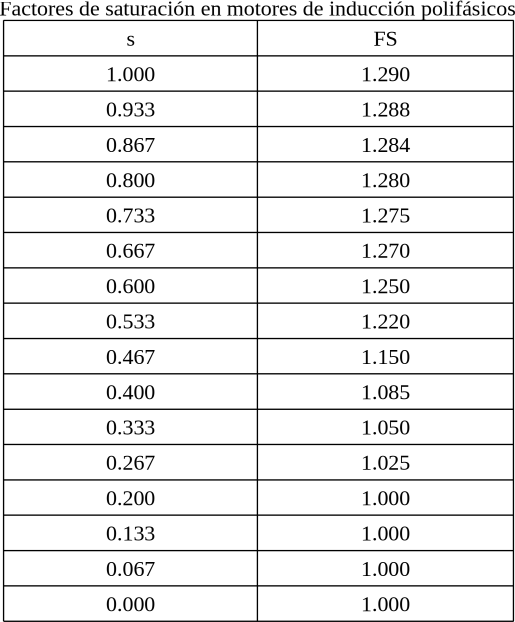

In [ ]:
from IPython.display import SVG
SVG(valid_path + 'din_fig3.svg')